In [59]:
import sqlite3
import plotly.express as px
import pandas as pd

import os
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

## Loading Climate Data 

In [71]:
conn = sqlite3.connect('../data/global_climate_insight_data.sqlite')
df_climate_data = pd.read_sql("SELECT * FROM global_climate_insight_data", conn)
conn.close()

df_climate_data['Date'] = pd.to_datetime(df_climate_data['Date'])
df_climate_data['Year'] = df_climate_data['Date'].dt.year


## Temperature Distribution Across Countries

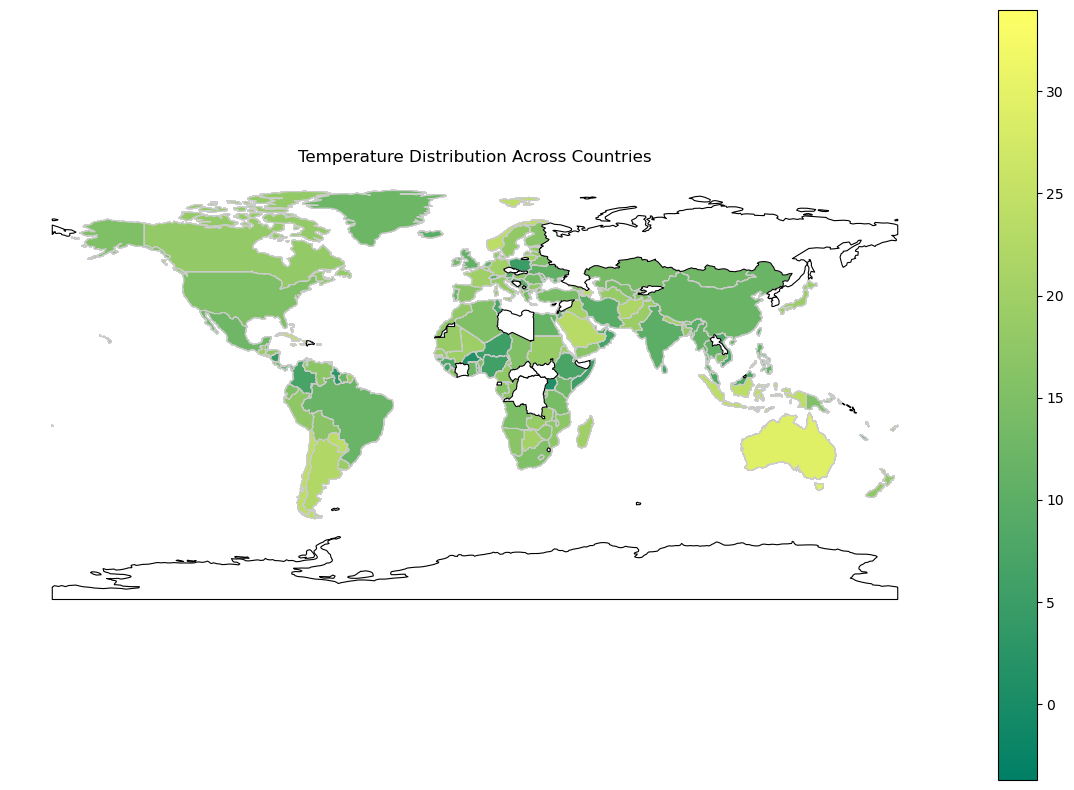

In [57]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(df_climate_data, how='left', left_on='name', right_on='Country')
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='Temperature', cmap='summer', linewidth=0.8, ax=ax, edgecolor='0.8',missing_kwds={
               "color": "white",
               "edgecolor": "black",
               "hatch": "",
               "label": "Missing values"}, legend=True)
ax.set_title('Temperature Distribution Across Countries')
ax.set_axis_off()
plt.show()

## CO2 Emissions Distribution Across Countries

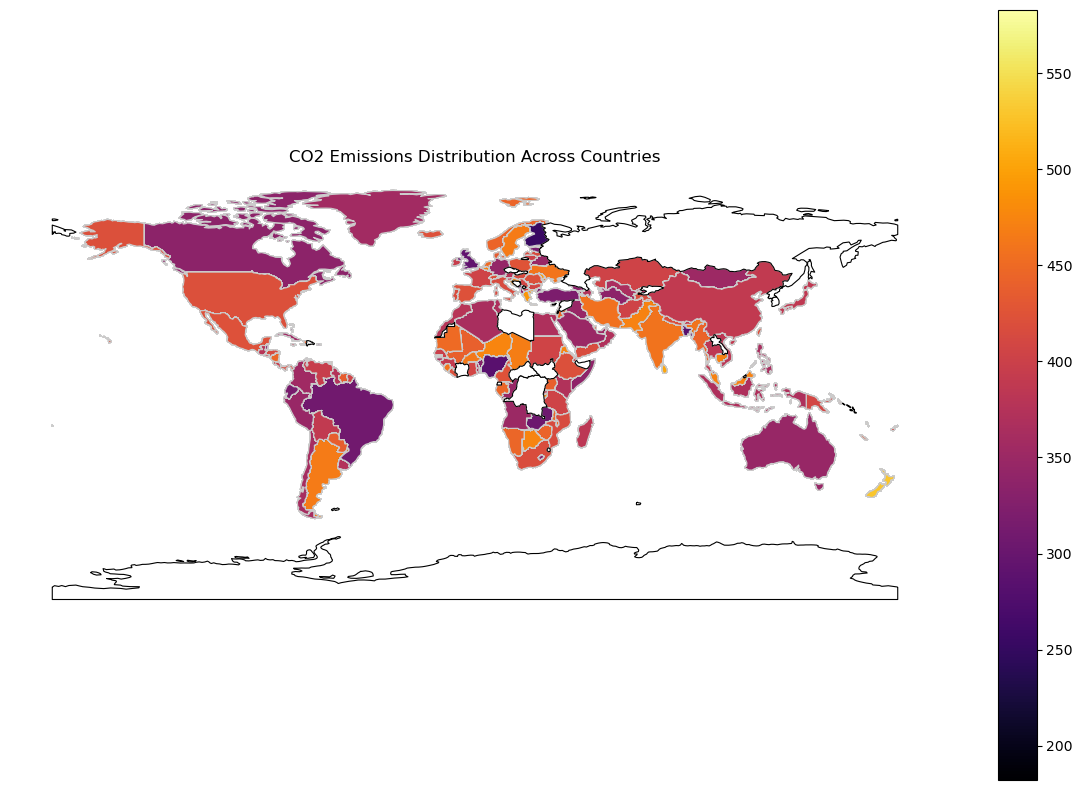

In [55]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(df_climate_data, how='left', left_on='name', right_on='Country')
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='CO2 Emissions', cmap='inferno', linewidth=0.8, ax=ax, edgecolor='0.8',missing_kwds={
               "color": "white",
               "edgecolor": "black",
               "hatch": "",
               "label": "Missing values"}, legend=True)
ax.set_title('CO2 Emissions Distribution Across Countries')
ax.set_axis_off()
plt.show()

## Precipitation Distribution Across Countries

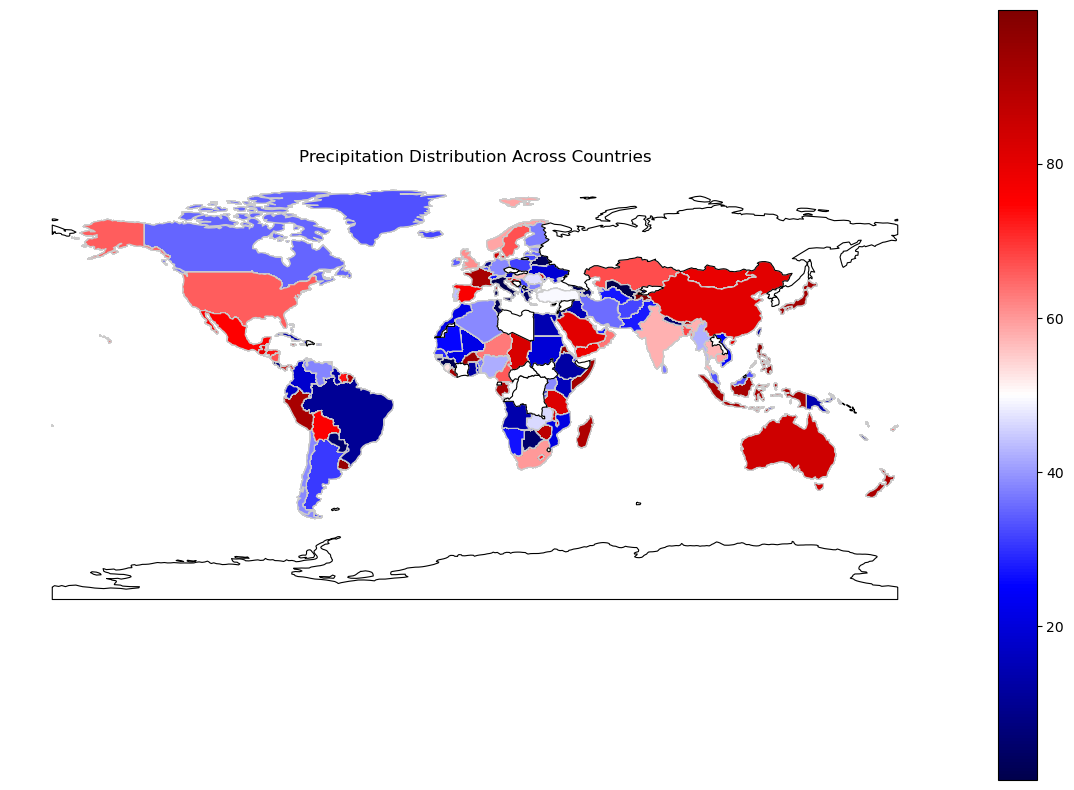

In [49]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(df_climate_data, how='left', left_on='name', right_on='Country')
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='Precipitation', cmap='seismic', linewidth=0.8, ax=ax, edgecolor='0.8',missing_kwds={
               "color": "white",
               "edgecolor": "black",
               "hatch": "",
               "label": "Missing values"}, legend=True)

ax.set_title('Precipitation Distribution Across Countries')
ax.set_axis_off()

plt.show()


## Loading Forest Area Data

In [69]:
conn = sqlite3.connect('../data/world_forest_data.sqlite')

df_forest_data = pd.read_sql("SELECT * FROM world_forest_data", conn)
df_forest_data.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,12084.4,12084.40,12084.40,12084.40,12084.40,12084.4,12084.40,12084.40,12084.40,...,12084.40,12084.400,12084.40,12084.400,12084.4,12084.400,12084.4,12084.4,12084.4,12084.400
1,Albania,7888.0,7868.50,7849.00,7829.50,7810.00,7790.5,7771.00,7751.50,7732.00,...,7849.17,7863.405,7877.64,7891.875,7891.8,7889.025,7889.0,7889.0,7889.0,7889.000
2,Algeria,16670.0,16582.00,16494.00,16406.00,16318.00,16230.0,16142.00,16054.00,15966.00,...,19332.00,19408.000,19484.00,19560.000,19560.0,19430.000,19300.0,19390.0,19490.0,19583.333
3,American Samoa,180.7,180.36,180.02,179.68,179.34,179.0,178.66,178.32,177.98,...,173.70,173.400,173.10,172.800,172.5,172.200,171.9,171.6,171.3,171.000
4,Andorra,160.0,160.00,160.00,160.00,160.00,160.0,160.00,160.00,160.00,...,160.00,160.000,160.00,160.000,160.0,160.000,160.0,160.0,160.0,160.000


## Average World Forest Area Distribution Across Countries

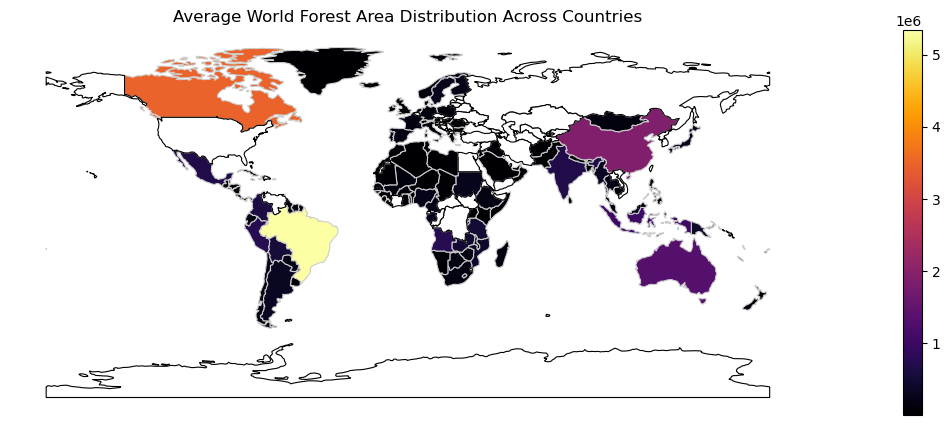

In [79]:
df_forest_data['Average'] = df_forest_data.iloc[:, 1:].mean(axis=1)  # Calculate the average world forest area for each country

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


world = world.merge(df_forest_data[['Country Name', 'Average']], how='left', left_on='name', right_on='Country Name')

fig, ax = plt.subplots(figsize=(25, 5))
world.plot(column='Average', cmap='inferno', linewidth=0.8, ax=ax, edgecolor='0.8', missing_kwds={
               "color": "white",
               "edgecolor": "black",
               "hatch": "",
               "label": "Missing values"},legend=True)


ax.set_title('Average World Forest Area Distribution Across Countries')
ax.set_axis_off()


plt.show()
conn.close()

## Global Average Temperature vs. Forest Area Over Years

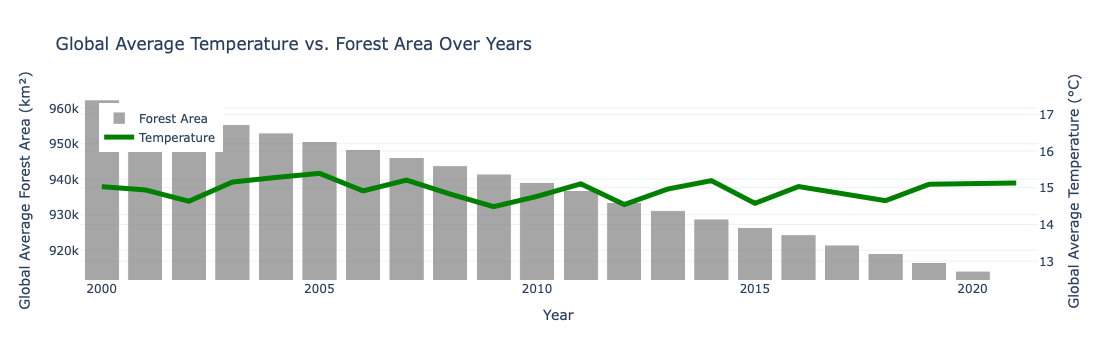

In [73]:
df_forest_long = df_forest_data.melt(id_vars=['Country Name'], var_name='Year', value_name='Forest Area')
df_forest_long['Year'] = df_forest_long['Year'].astype(int)

df_combined = pd.merge(df_forest_long, df_climate_data, on='Year', how='inner')

global_avg_temperature = df_combined.groupby('Year')['Temperature'].mean().reset_index()
global_avg_forest_area = df_combined.groupby('Year')['Forest Area'].mean().reset_index()


fig = go.Figure()

fig.add_trace(go.Bar(
    x=global_avg_forest_area['Year'],
    y=global_avg_forest_area['Forest Area'],
    name='Forest Area',
    marker_color='grey',
    opacity=0.7,
    yaxis='y'
))

fig.add_trace(go.Scatter(
    x=global_avg_temperature['Year'],
    y=global_avg_temperature['Temperature'],
    mode='lines',
    name='Temperature',
    line=dict(color='green', width=5),
    yaxis='y2'
))

fig.update_layout(
    title='Global Average Temperature vs. Forest Area Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Global Average Forest Area (km²)', side='left', rangemode='tozero', showgrid=True, 
              range=[min(global_avg_forest_area['Forest Area']) - 2, max(global_avg_forest_area['Forest Area']) + 2]),
    yaxis2=dict(title='Global Average Temperature (°C)', overlaying='y', side='right', rangemode='tozero', showgrid=True,
                range=[min(global_avg_temperature['Temperature']) - 2, max(global_avg_temperature['Temperature']) + 2]),
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0,0,0,0)',
    hovermode='x',
    template='plotly_white'
)

fig.update_traces(hoverinfo='x+y')

fig.show()

## Global Average Precipitation vs. Forest Area Over Years

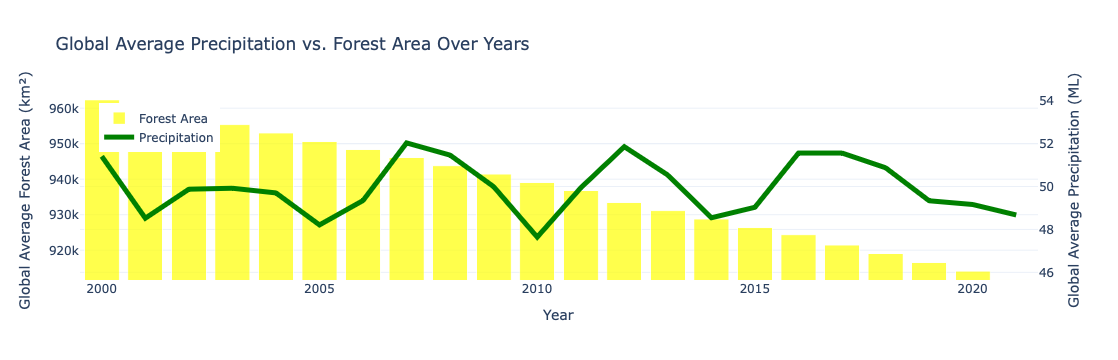

In [75]:
df_forest_long = df_forest_data.melt(id_vars=['Country Name'], var_name='Year', value_name='Forest Area')
df_forest_long['Year'] = df_forest_long['Year'].astype(int)

df_combined = pd.merge(df_forest_long, df_climate_data, on='Year', how='inner')

global_avg_temperature = df_combined.groupby('Year')['Precipitation'].mean().reset_index()
global_avg_forest_area = df_combined.groupby('Year')['Forest Area'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=global_avg_forest_area['Year'],
    y=global_avg_forest_area['Forest Area'],
    name='Forest Area',
    marker_color='yellow',
    opacity=0.7,
    yaxis='y'
))

fig.add_trace(go.Scatter(
    x=global_avg_temperature['Year'],
    y=global_avg_temperature['Precipitation'],
    mode='lines',
    name='Precipitation',
    line=dict(color='green', width=5),
    yaxis='y2'
))

fig.update_layout(
    title='Global Average Precipitation vs. Forest Area Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Global Average Forest Area (km²)', side='left', rangemode='tozero', showgrid=True, 
              range=[min(global_avg_forest_area['Forest Area']) - 2, max(global_avg_forest_area['Forest Area']) + 2]),
    yaxis2=dict(title='Global Average Precipitation (ML)', overlaying='y', side='right', rangemode='tozero', showgrid=True,
                range=[min(global_avg_temperature['Precipitation']) - 2, max(global_avg_temperature['Precipitation']) + 2]),
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0,0,0, 0)',
    hovermode='x',
    template='plotly_white'
)

fig.update_traces(hoverinfo='x+y')

fig.show()

## Global Average CO2 Emissions vs. Forest Area Over Years

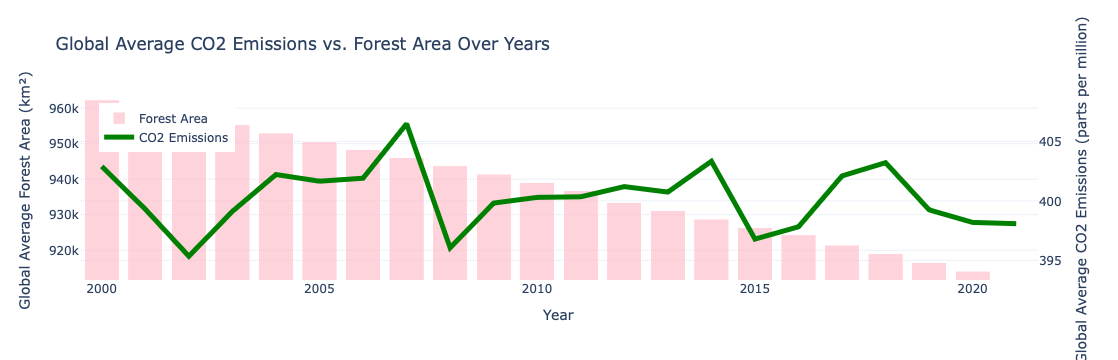

In [77]:
df_forest_long = df_forest_data.melt(id_vars=['Country Name'], var_name='Year', value_name='Forest Area')
df_forest_long['Year'] = df_forest_long['Year'].astype(int)

df_combined = pd.merge(df_forest_long, df_climate_data, on='Year', how='inner')

global_avg_temperature = df_combined.groupby('Year')['CO2 Emissions'].mean().reset_index()
global_avg_forest_area = df_combined.groupby('Year')['Forest Area'].mean().reset_index()


fig = go.Figure()

fig.add_trace(go.Bar(
    x=global_avg_forest_area['Year'],
    y=global_avg_forest_area['Forest Area'],
    name='Forest Area',
    marker_color='pink',
    opacity=0.7,
    yaxis='y'
))

fig.add_trace(go.Scatter(
    x=global_avg_temperature['Year'],
    y=global_avg_temperature['CO2 Emissions'],
    mode='lines',
    name='CO2 Emissions',
    line=dict(color='green', width=5),
    yaxis='y2'
))

fig.update_layout(
    title='Global Average CO2 Emissions vs. Forest Area Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Global Average Forest Area (km²)', side='left', rangemode='tozero', showgrid=True, 
              range=[min(global_avg_forest_area['Forest Area']) - 2, max(global_avg_forest_area['Forest Area']) + 2]),
    yaxis2=dict(title='Global Average CO2 Emissions (parts per million)', overlaying='y', side='right', rangemode='tozero', showgrid=True,
                range=[min(global_avg_temperature['CO2 Emissions']) - 2, max(global_avg_temperature['CO2 Emissions']) + 2]),
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='rgba(0,0,0, 0)',
    hovermode='x',
    template='plotly_white'
)

fig.update_traces(hoverinfo='x+y')

fig.show()